# Modeling and Simulation in Python

Rabbit example

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [280]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt5

# To switch from one to another, you have to select Kernel->Restart

%matplotlib inline

from modsim import *
import numpy as np 
import pandas as pd

This notebook develops a simple growth model, like the ones in Chapter 3, and uses it to demonstrate a parameter sweep.

The system we'll model is a rabbit farm.  Suppose you start with an initial population of rabbits and let them breed.  For simplicity, we'll assume that all rabbits are on the same breeding cycle, and we'll measure time in "seasons", where a season is the reproductive time of a rabbit.

If we provide all the food, space and other resources a rabbit might need, we expect the number of new rabbits each season to be proportional to the current population, controlled by a parameter, `birth_rate`, that represents the number of new rabbits per existing rabbit, per season.  As a starting place, I'll assume `birth_rate = 0.9`.

Sadly, during each season, some proportion of the rabbits die.  In a detailed model, we might keep track of each rabbit's age, because the chance of dying is probably highest for young and old rabbits, and lowest in between.  But for simplicity, we'll model the death process with a single parameter, `death_rate`, that represent the number
of deaths per rabbit per season.   As a starting place, I'll assume `death_rate = 0.5`.

Here's a system object that contains these parameters as well as:

* The initial population, `p0`,
* The initial time, `t0`, and
* The duration of the simulation, `t_end`, measured in seasons.

In [281]:
#files on naomi's computer here 
'''
pop=pd.read_csv("C:/ModSim/Population.csv", header=0, index_col=0)
print(pop)

rem=pd.read_csv("C:/ModSim/Removed.csv", header=0, index_col=0)
print(rem)

spy=pd.read_csv("C:/ModSim/Spayed.csv", header=0, index_col=0)
print(spy)
'''

'\npop=pd.read_csv("C:/ModSim/Population.csv", header=0, index_col=0)\nprint(pop)\n\nrem=pd.read_csv("C:/ModSim/Removed.csv", header=0, index_col=0)\nprint(rem)\n\nspy=pd.read_csv("C:/ModSim/Spayed.csv", header=0, index_col=0)\nprint(spy)\n'

In [282]:
'''
population = pop.pop
pop.head()

removed = rem.Removed
rem.head()
'''

'\npopulation = pop.pop\npop.head()\n\nremoved = rem.Removed\nrem.head()\n'

In [589]:
data=pd.read_csv("~/documents/github/modsimpy/data.csv", header = 0, index_col = 0)
print(data)

       population  spayed  removed
year                              
2017      72674.0       0        0
2016          NaN     487     3259
2015      58150.0     469     3812
2014      49209.0      40     1857
2013      40605.0     332     5452
2012      37294.0     952     8255
2011      38497.0     791     8529
2010      38365.0     429     7291
2009      36940.0       0     6036
2008      33105.0       0        0
2007      28563.0       0        0
2006      31206.0       0        0
2005      31760.0       0        0
2004      37135.0       0        0
2003      37186.0       0        0
2002      38815.0       0        0
2001      45414.0       0        0
2000      48624.0       0        0
1999      47376.0       0        0
1998      44495.0       0        0
1997      43036.0       0        0
1996      42138.0       0        0


In [284]:
data.head()

,population,spayed,removed
year,,,
2017,72674.0,NaN,NaN
2016,NaN,487.0,3259.0
2015,58150.0,469.0,3812.0
2014,49209.0,40.0,1857.0
2013,40605.0,332.0,5452.0


In [285]:
data.columns = ['population', 'spayed', 'removed']

In [286]:
data.index[-1]

1996

In [1103]:
######
#this is the first model, using a 20% growth rate with actual removals subtracted from the model
######

In [1104]:
population = data.population
removal = data.removed
#first_year = data.index[-1] #these #s are because the data is backwards 
first_year = 2009
last_year = data.index[0]
initial_population = data['population'][2009] 
growth_rate= 0.2

In [1105]:
system = System(t0 = first_year, p0 = initial_population, t_end = last_year, growth_rate = growth_rate)

In [1106]:
line = TimeSeries()
for i in linrange(system.t0, system.t_end):
    line[i] = 27000
AML = line 

In [1107]:
def run_simulation3(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        growth = system.growth_rate * results[t]
        results[t+1] = results[t] + growth - data['removed'][t]
       # population_before = results[t] - data['removed'][t]
        #results[t+1] = population_before + (system.growth_rate * population_before)
    system.results = results

In [1108]:
run_simulation3(system)

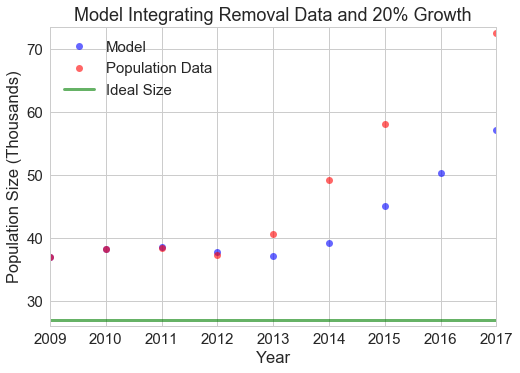

In [1109]:
sns.set(style='whitegrid', font_scale=1.5)
plot(system.results/1000, 'bo', label = 'Model')
plot(population/1000, 'ro', label='Population Data')
decorate(title='Model Integrating Removal Data and 20% Growth', xlabel='Year', ylabel='Population Size (Thousands)')
plot(AML/1000, 'g-', label='Ideal Size')
legend()
xlim(2009, 2017);

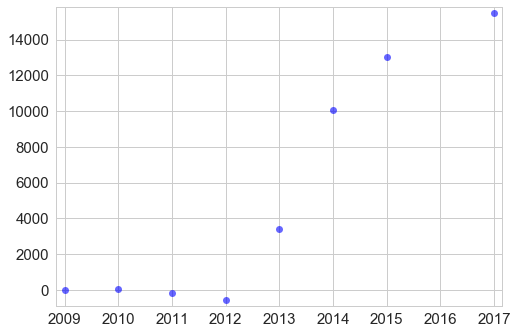

In [883]:
######
#this is a graph of how wrong the model is over time. 
stuff = population - system.results
plot(stuff, 'bo', label = 'predicted')


In [598]:
###########
#this model uses a higher growth rate for the second half to try to fit the data (bad!)
###########

In [1111]:
line = TimeSeries()
for i in linrange(system.t0, system.t_end):
    line[i] = 27000
AML = line 

In [1112]:
population = data.population
removal = data.removed
#first_year = data.index[-1] #these #s are because the data is backwards 
first_year = 2009
last_year = data.index[0]
initial_population = data['population'][2009] 
growth1= 0.2
growth2 = 0.275


In [1113]:
system = System(t0 = first_year, p0 = initial_population, t_end = last_year, growth1 = growth1, growth2=growth2)

In [1114]:
def run_simulation4(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        if t < 2012:
            growth = system.growth1 * results[t]
            results[t+1] = results[t] + growth - data['removed'][t]
        else:
            growth = system.growth2 * results[t]
            results[t+1] = results[t] + growth - data['removed'][t]
    system.results = results

In [1115]:
run_simulation4(system)

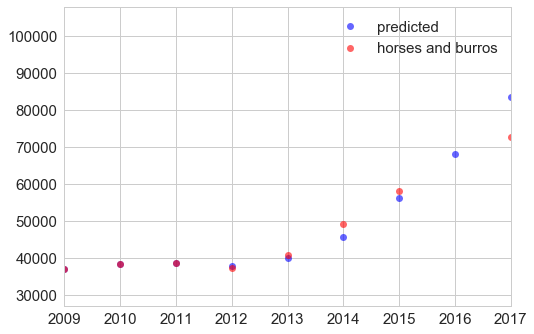

In [1116]:
sns.set(style='whitegrid', font_scale=1.5)
plot(system.results, 'bo', label = 'predicted')
plot(population, 'ro', label='horses and burros')
xlim(2009, 2017);
legend()

In [605]:
####
#this is a plot of all the historic data plus the above model
####

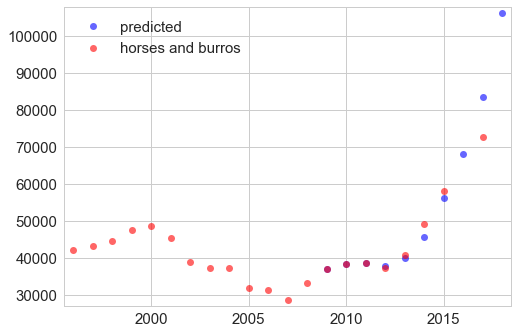

In [890]:
sns.set(style='whitegrid', font_scale=1.5)
plot(system.results, 'bo', label = 'predicted')
plot(population, 'ro', label='horses and burros')

legend()

In [891]:
###############
#this one is about adding stochasticity to the growth rate on a gaussian dist 
###############

In [1117]:
line = TimeSeries()
for i in linrange(system.t0, system.t_end):
    line[i] = 27000
AML = line 

In [1118]:
# mean and standard deviation assuming upper and lower growth rate bound 2 sd from mean
mean, standard_dev = 0.156, 0.0085 

In [1119]:
rate = np.random.normal (mean, standard_dev, 10)

In [1120]:
rate 

array([ 0.13701739,  0.14582769,  0.15076073,  0.14360684,  0.14952517,
        0.15981231,  0.14690033,  0.15729149,  0.1650935 ,  0.15535137])

In [1121]:
population = data.population
removal = data.removed
#first_year = data.index[-1] #these #s are because the data is backwards 
first_year = 2009
last_year = data.index[0]
initial_population = data['population'][2009] 
mean_growth_rate = 0.25 #0.156 # mean growth rate calculated from "doubling every 4-5 years" stat
standard_dev_growth = 0.0085 #standard deviation of growth rate assuming upper and lower growth rate bound 2 sd from mean

In [1122]:
system = System(t0 = first_year, p0 = initial_population, t_end = last_year, 
                mean_growth = mean_growth_rate, 
                sd_growth = standard_dev_growth)

In [1123]:
def growth_rate(mean = system.mean_growth, sd = system.sd_growth): 
    rate = np.random.normal (mean, sd) 
    return rate 

In [1124]:
def run_simulation4(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        growth = growth_rate() * results[t]
        results[t+1] = results[t] + growth - data['removed'][t]
    system.results = results

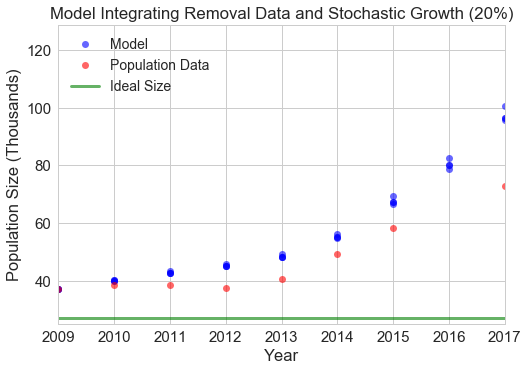

In [1125]:
def run_and_plot(num = 3):
    for i in range(num):
        run_simulation4(system)
        plot(system.results/1000, 'bo', label = 'Model')
run_and_plot()
sns.set(style='whitegrid', font_scale=1.4)
plot(system.results/1000, 'bo', label = 'Model')
plot(population/1000, 'ro', label='Population Data')
decorate(title='Model Integrating Removal Data and Stochastic Growth (20%)', xlabel='Year', ylabel='Population Size (Thousands)')
plot(AML/1000, 'g-', label='Ideal Size')
legend()
xlim(2009, 2017);

In [1126]:
##############
#this one is about adding fertility treatment historical data
##############

In [619]:
line = TimeSeries()
for i in linrange(system.t0, system.t_end):
    line[i] = 27000
AML = line 

In [620]:
population = data.population
removal = data.removed
#first_year = data.index[-1] #these #s are because the data is backwards 
first_year = 2009
last_year = data.index[0]
initial_population = data['population'][2009] 
mean_growth_rate = 0.2 #0.156 # mean growth rate calculated from "doubling every 4-5 years" stat
#standard deviation of growth rate assuming upper and lower growth rate bound 2 sd from mean
standard_dev_growth = 0.0085 
fertility_treated = data.spayed

In [621]:
system = System(t0 = first_year, p0 = initial_population, t_end = last_year, 
                mean_growth = mean_growth_rate, 
                sd_growth = standard_dev_growth, spay_rate = fertility_treat_rate)

In [622]:
def growth_rate(mean = system.mean_growth, sd = system.sd_growth): 
    rate = np.random.normal (mean, sd) 
    return rate 

In [623]:
data['spayed']

year 
2017      0
2016    487
2015    469
2014     40
2013    332
2012    952
2011    791
2010    429
2009      0
2008      0
2007      0
2006      0
2005      0
2004      0
2003      0
2002      0
2001      0
2000      0
1999      0
1998      0
1997      0
1996      0
Name: spayed, dtype: int64

In [628]:
def run_simulation5(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        spayed = data['spayed'][t]
        reproducing = results[t] - spayed
        growth = growth_rate() * reproducing
        results[t+1] = results[t] + growth - data['removed'][t] 
    system.results = results

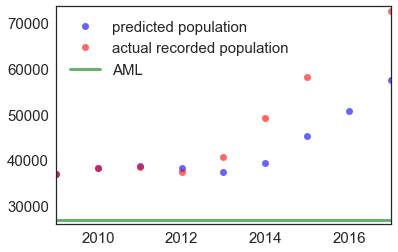

In [629]:
run_simulation5(system)
plot(system.results, 'bo', label = 'predicted population')
plot(population, 'ro', label='actual recorded population')
plot(AML, 'g-', label='AML')
legend()
xlim(2009, 2017);

In [630]:
##############
#this model takes custom stochastic growth rates, fixed removal rates, spay rates 
##############

In [1160]:
population = data.population
#first_year = data.index[-1] #these #s are because the data is backwards 
first_year = 2017
last_year = 2050
initial_population = data['population'][2017] 
mean_growth_rate = 0.2 #0.156 # mean growth rate calculated from "doubling every 4-5 years" stat
#standard deviation of growth rate assuming upper and lower growth rate bound 2 sd from mean
standard_dev_growth = 0.0085 
fertility_treat_rate = 0.015 #also referred to here as "spay_rate," although it only lasts 1 year 
removal_rate = 0.14

In [1161]:
line = TimeSeries()
for i in linrange(data.index[-1], last_year):
    line[i] = 27000
AML = line 

In [1162]:
system = System(t0 = first_year, p0 = initial_population, t_end = last_year, 
                mean_growth = mean_growth_rate, 
                sd_growth = standard_dev_growth, 
                spay_rate = fertility_treat_rate, 
                removal_rate = removal_rate)

In [1163]:
def growth_rate(mean = system.mean_growth, sd = system.sd_growth): 
    rate = np.random.normal (mean, sd) 
    return rate 

In [1164]:
def run_simulation6(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        spayed = system.spay_rate * results[t]
        reproducing = results[t] - spayed
        removed = system.removal_rate * results[t]
        growth = growth_rate() * reproducing
        results[t+1] = results[t] + growth - removed
    system.results = results

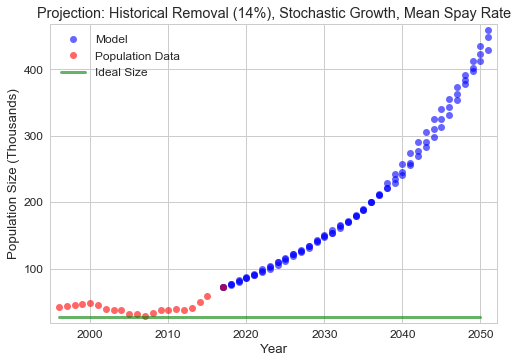

In [1166]:
def run_and_plot(num = 3):
    for i in range(num):
        run_simulation6(system)
        plot(system.results/1000, 'bo', label = 'Model')
run_and_plot()
sns.set(style='whitegrid', font_scale=1.2)
plot(population/1000, 'ro', label='Population Data')
plot(AML/1000, 'g-', label='Ideal Size')
decorate(title='Projection: Historical Removal (14%), Stochastic Growth, Mean Spay Rate', xlabel='Year', ylabel='Population Size (Thousands)')
legend()
#xlim(2009, 2017);

In [637]:
##############
#this model takes custom stochastic growth rates, stochastic removal rates, spay rates 
#(not better than with constant removal)
##############

In [746]:
line = TimeSeries()
for i in linrange(system.t0, system.t_end):
    line[i] = 27000
AML = line 

In [963]:
population = data.population
#first_year = data.index[-1] #these #s are because the data is backwards 
first_year = 2009
last_year = 2017#data.index[0]
initial_population = data['population'][2009] 
mean_growth_rate = 0.2 #0.156 # mean growth rate calculated from "doubling every 4-5 years" stat
#standard deviation of growth rate assuming upper and lower growth rate bound 2 sd from mean
standard_dev_growth = 0.0085 
fertility_treat_rate = 0.015 #also referred to here as "spay_rate," although it only lasts 1 year 
mean_removal_rate = 0.1477 #mean removal rate calculated from actual data 
sd_removal_rate = .02 #sd of removal rate calculated from actual data 

In [964]:
system = System(t0 = first_year, p0 = initial_population, t_end = last_year, 
                mean_growth = mean_growth_rate, 
                sd_growth = standard_dev_growth, 
                spay_rate = fertility_treat_rate, 
                mean_removed = mean_removal_rate,
                sd_removed = sd_removal_rate)

In [965]:
def growth_rate(mean = system.mean_growth, sd = system.sd_growth): 
    rate = np.random.normal (mean, sd) 
    return rate 

In [966]:
def removal_rate(mean = system.mean_removed, sd = system.sd_removed): 
    rate = np.random.normal (mean, sd) 
    return rate 

In [967]:
def run_simulation7(system):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        spayed = system.spay_rate * results[t]
        reproducing = results[t] - spayed
        removed = removal_rate() * results[t]
        growth = growth_rate() * reproducing
        results[t+1] = results[t] + growth - removed
    system.results = results

In [970]:
def run_and_plot(num = 3):
    for i in range(num):
        run_simulation7(system)
        plot(system.results, 'bo', label = 'predicted population')
    plot(population, 'ro', label='actual recorded population')
    plot(AML, 'g-', label='AML')
    legend()
    xlim(2009, 2017);

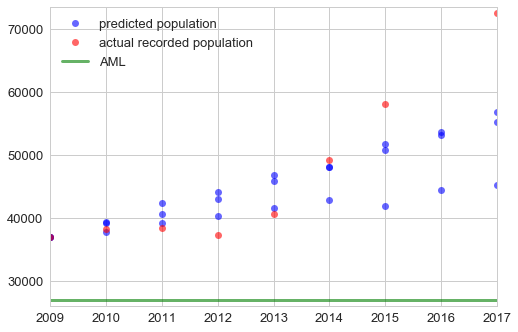

In [974]:
run_and_plot()

In [763]:
##############
#this model parameter has a stochastic growth rate, sweeps removal rate and takes a constant spay rate 
##############

In [1150]:
population = data.population
#first_year = data.index[-1] #these #s are because the data is backwards 
first_year = 2017
last_year = 2050
initial_population = data['population'][2017] 
mean_growth_rate = 0.2 #0.156 # mean growth rate calculated from "doubling every 4-5 years" stat
#standard deviation of growth rate assuming upper and lower growth rate bound 2 sd from mean
standard_dev_growth = 0.0085 
fertility_treat_rate = 0.2 #also referred to here as "spay_rate," although it only lasts 1 year 

In [1151]:
line = TimeSeries()
for i in linrange(data.index[-1], last_year):
    line[i] = 27000
AML = line 

In [1152]:
system = System(t0 = first_year, p0 = initial_population, t_end = last_year, 
                mean_growth = mean_growth_rate, 
                sd_growth = standard_dev_growth, 
                spay_rate = fertility_treat_rate, 
                removal_rate = removal_rate)

In [1153]:
def growth_rate(mean = system.mean_growth, sd = system.sd_growth): 
    rate = np.random.normal (mean, sd) 
    return rate 

In [1154]:
def run_simulation8(system, removal_rate):
    """Runs a proportional growth model.
    
    Adds TimeSeries to `system` as `results`.
    
    system: System object with t0, t_end, p0,
            birth_rate and death_rate
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        spayed = system.spay_rate * results[t]
        reproducing = results[t] - spayed
        removed = removal_rate * results[t]
        growth = growth_rate() * reproducing
        results[t+1] = results[t] + growth - removed
    system.results = results
    return system.results 

In [1155]:
def parameter_sweep(system, num_sweep = 7, lower_removal = 0.1, upper_removal = 0.25): 
    removal_array = linspace(lower_removal, upper_removal, num_sweep)
    plot(population/1000, 'ro', label='Population Data')
    plot(AML/1000, 'g-', label='Ideal Size')
    for removal in removal_array:  
        run_simulation8(system, removal)
        plot(system.results/1000, label = int(removal*100))
    sns.set(style='whitegrid', font_scale=1.3)
    
    decorate(title='Projection: Varying Removal, Stochastic Growth, Mean Spay Rate', xlabel='Year', ylabel='Population Size (Thousands)')
    legend(loc = 'best')
    ylim(20, 100)

In [1148]:
run_simulation8(system, 4);

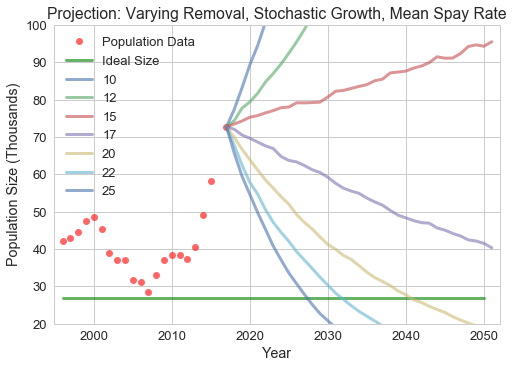

In [1159]:
parameter_sweep(system)

In [ ]:
#below are attempts to plot an iterated parameter sweep with one color and label per variation in the sweep 

In [872]:
def parameter_sweep(num_sweep, lower_removal = 0, upper_removal = 0.5, plot_labels=True): 
    removal_array = linspace(lower_removal, upper_removal, num_sweep)
    plot_style = {0: 'r', 0.125: 'g', 0.25: 'y', 0.375: 'o', 0.5: 'b'}
    for removal in removal_array:
        system = System(t0 = first_year, p0 = initial_population, t_end = last_year, 
                mean_growth = mean_growth_rate, 
                sd_growth = standard_dev_growth, 
                spay_rate = fertility_treat_rate, 
                removal_rate = removal_rate)
        results = run_simulation8(system, removal)
        if plot_labels:
            plot(results, plot_style[removal], label=removal*100)
        else:
            plot(results, plot_style[removal])
#         plot(results, label = removal*100)

In [873]:
def run_and_plot(lower_removal, upper_removal, num_sweep=5, iterations = 3, ):
    for i in range(iterations):
        parameter_sweep(num_sweep, lower_removal, upper_removal, i == 0) 
    plot(population, 'ro', label='actual recorded population')
    plot(AML, 'k--', label='AML')
    legend()
    title('if nothing is done')
   # xlim(2009, 2017);
   # decorate(title='', xlabel='', ylabel='')

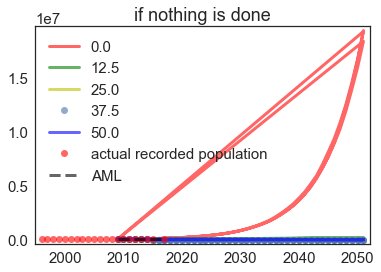

In [874]:
run_and_plot(num_sweep=5, iterations = 3, lower_removal = 0, upper_removal = 0.5)

In [824]:
def parameter_sweep(system, num_sweep = 5, lower_removal = 0, upper_removal = 0.5, iterations = 3): 
    removal_array = linspace(lower_removal, upper_removal, num_sweep)
    for removal in removal_array: 
        for i in range (iterations): 
            plot = TimeSeries()
            plot[i] = i-1
            plot[i+1] = run_simulation8(system, removal)
        system.plot = plot 
        plot(plot, 'ro', label='actual recorded population')
    plot(AML, 'k--', label='AML')
    legend()
    xlim(2009, 2017);
    plot(system.results, label = removal*100)
        

In [825]:
def run_and_plot():
    for i in range(iterations):
        parameter_sweep(num_sweep, lower_removal, upper_removal) 
    plot(population, 'ro', label='actual recorded population')
    plot(AML, 'k--', label='AML')
    legend()
    xlim(2009, 2017);

In [826]:
parameter_sweep(system)

AttributeError: can't set attribute